In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv("C:\\Users\Mallesh\\Desktop\movies.zip")

In [3]:
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [4]:
data.shape

(40000, 2)

In [5]:
data.shape[1]

2

In [6]:
data.shape[0]

40000

In [7]:
data.columns

Index(['text', 'label'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [9]:
data.dtypes

text     object
label     int64
dtype: object

In [10]:
data.isna()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
39995,False,False
39996,False,False
39997,False,False
39998,False,False


In [11]:
data.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
39995,False,False
39996,False,False
39997,False,False
39998,False,False


In [12]:
data.isna().sum()

text     0
label    0
dtype: int64

In [13]:
data.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [14]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [15]:
# Analyze movie ratings and user preferences
# For example, calculate average ratings for each movie
average_ratings = data.groupby('label')['label'].count()
print("Average ratings for each movie:")
print(average_ratings)

Average ratings for each movie:
label
0    20019
1    19981
Name: label, dtype: int64


In [16]:
# Calculate the average rating for movies
average_rating = data['label'].mean()
print("Average rating for movies:", average_rating)

# Identify highly-rated movies (assuming 'label' column represents ratings)
highly_rated_movies = data[data['label'] == 1]
print("Highly-rated movies:")
print(highly_rated_movies)

# Determine the most active users (assuming 'text' represents user activity)
most_active_users = data['text'].value_counts().head(10)  # Adjust the number as per your requirement
print("Most active users:")
print(most_active_users)

Average rating for movies: 0.499525
Highly-rated movies:
                                                    text  label
4      Im a die hard Dads Army fan and nothing will e...      1
6      Finally watched this shocking movie last night...      1
8      It may be the remake of 1987 Autumn's Tale aft...      1
9      My Super Ex Girlfriend turned out to be a plea...      1
10     I can't believe people are looking for a plot ...      1
...                                                  ...    ...
39992  Although I agree that it's a good but not grea...      1
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[19981 rows x 2 columns]
Most active users:
text
Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favor

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk

In [19]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mallesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import nltk

# Download NLTK punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mallesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [22]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing punctuation and stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)

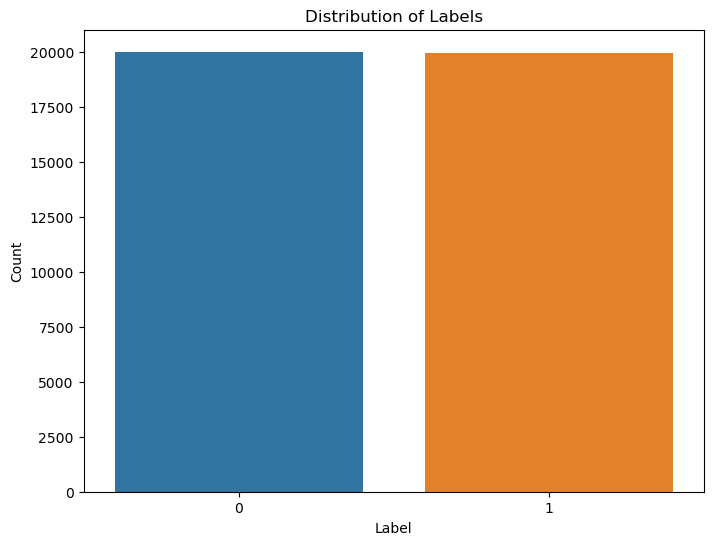

In [23]:
# Now, let's visualize the data
# Example 1: Histogram of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

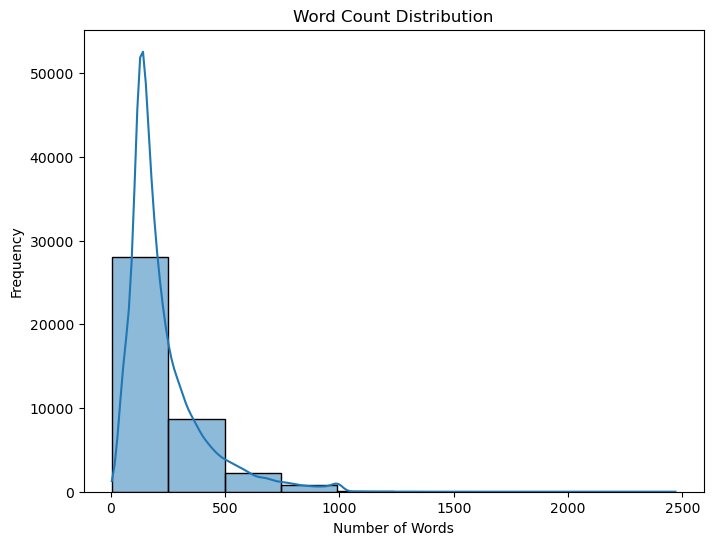

In [24]:
# Example 2: Word count histogram
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='word_count', bins=10, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

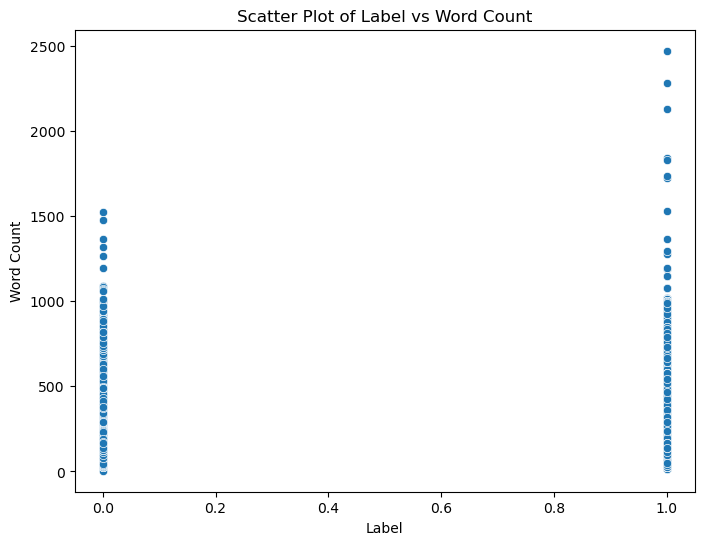

In [25]:
# Example 3: Scatter plot (not sure what to use as x and y, so using dummy values)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='label', y='word_count')
plt.title('Scatter Plot of Label vs Word Count')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

C:\Users\Mallesh\AppData\Local\Temp\ipykernel_18412\3160324254.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label', y='text_length', data=data, ci=None)


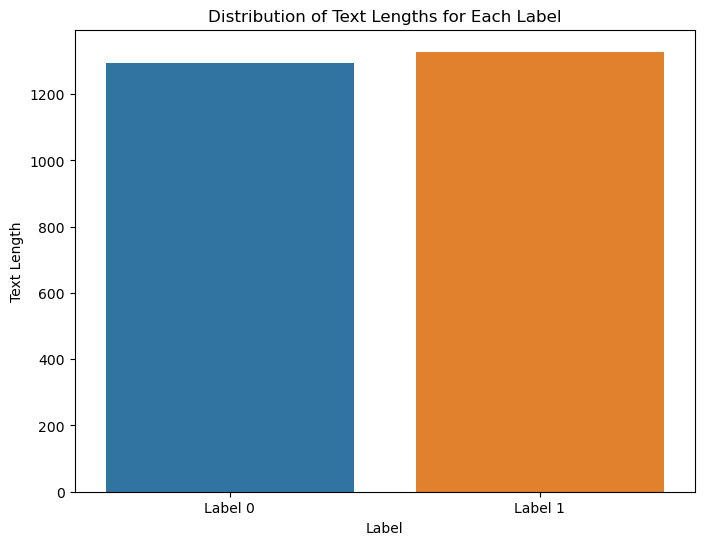

In [26]:
data['text_length'] = data['text'].apply(len)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='text_length', data=data, ci=None)
plt.title('Distribution of Text Lengths for Each Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.xticks(ticks=[0, 1], labels=['Label 0', 'Label 1'])
plt.show()

In [27]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [28]:
from textblob import TextBlob

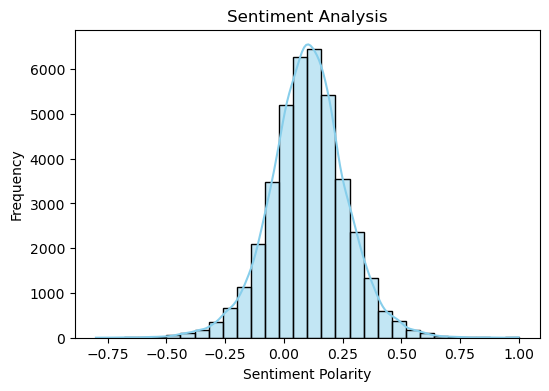

In [29]:
# Perform sentiment analysis
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment
plt.figure(figsize=(6, 4))
sns.histplot(data, x='sentiment', bins=30, kde=True, color='skyblue')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()